<a href="https://colab.research.google.com/github/rafalsza/moje/blob/master/model_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODEL **PREDICTION**

In [1]:
!pip install yfinance
!pip install prophet

     |████████████████████████████████| 6.4 MB 7.6 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 65 kB 2.4 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
  Created wheel for prophet: filename=prophet-1

In [2]:
import matplotlib.pyplot as plt
import yfinance as yf
from fbprophet import Prophet
import pandas as pd
from fbprophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [3]:
symbol = 'btc-usd'
df = yf.download(symbol, start='2011-01-01')
print(df.head())
df = df.reset_index()
df[['ds', 'y']] = df[['Date', 'Adj Close']]

[*********************100%***********************]  1 of 1 completed
                  Open        High  ...   Adj Close    Volume
Date                                ...                      
2014-09-17  465.864014  468.174011  ...  457.334015  21056800
2014-09-18  456.859985  456.859985  ...  424.440002  34483200
2014-09-19  424.102997  427.834991  ...  394.795990  37919700
2014-09-20  394.673004  423.295990  ...  408.903992  36863600
2014-09-21  408.084991  412.425995  ...  398.821014  26580100

[5 rows x 6 columns]


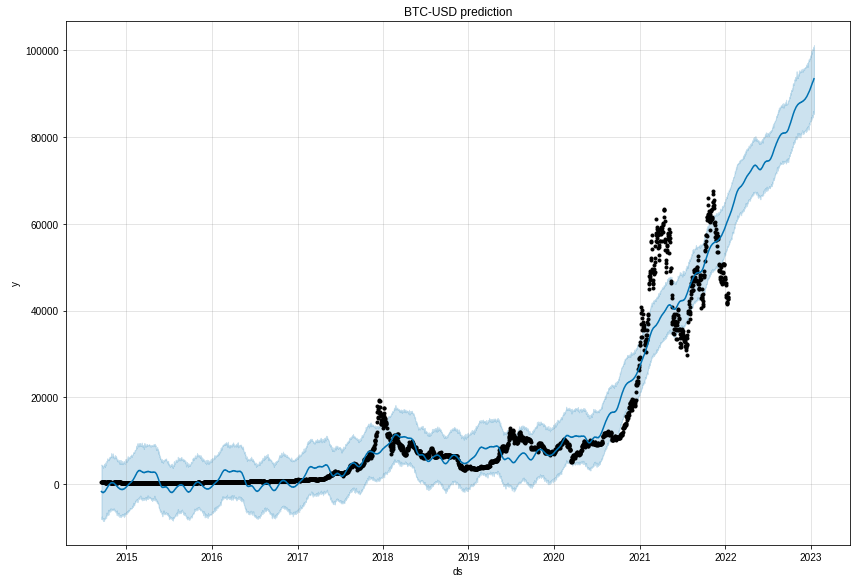

In [4]:
model = Prophet(daily_seasonality=True)
model.fit(df)
future = model.make_future_dataframe(365)
forecast = model.predict(future)
model.plot(forecast,figsize=(12,8))
plt.title(f'{symbol.upper()} prediction')
plt.style.use('seaborn-dark')

In [5]:
fig = plot_plotly(model, forecast, xlabel='date', ylabel='price')
fig.update_layout(template='ggplot2',title_text=f'{symbol.upper()} prediction')
fig.show()

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)